In [42]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import networkx as nx
import pickle

In [59]:
def on_hand_inventory(model,ver):
    path = "c:\\Users\\HD\\Documents\\Development\\or-gym\\scenarios\\"
    pickle_path = path+model+"_"+ver+"/run"
    inv = {j+1: pd.DataFrame(np.zeros((31,100))) for j in range(6)}
    for i in range(100):
        env = pickle.load(open(pickle_path+str(i)+".pkl", "rb"))
        for j in range(6):
            inv[j+1][i] = env.X[j+1]
    
    inv_mean = {j+1: inv[j+1].mean(axis=1) for j in range(6)}

    fig, axs = plt.subplots(2, 3, sharex=True, sharey=False)
    axs = axs.ravel()
    for j in range(6):
        axs[j].plot(inv_mean[j+1])
        axs[j].set_title("Node = "+str(j+1))
    fig.show()

    return inv_mean

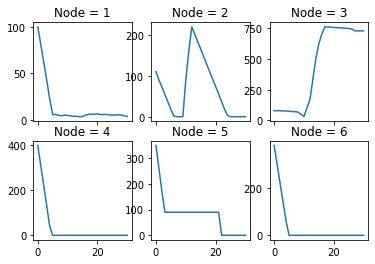

In [61]:
i=on_hand_inventory("DLP_RH","v2")

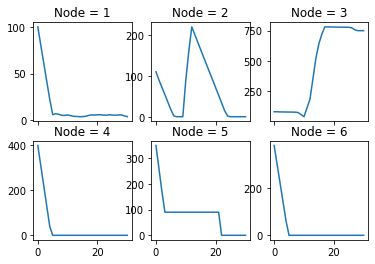

In [62]:
i=on_hand_inventory("DLP_RH","v3")

23.300322580645158

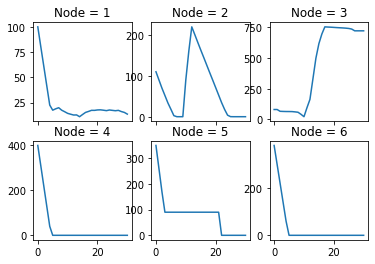

In [64]:
oh_inv_rh=on_hand_inventory("MSSP_RH","v3")
oh_inv_rh[1].mean()

20.05387096774193

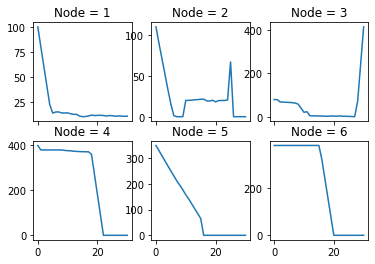

In [65]:
oh_inv_rh=on_hand_inventory("MSSP_SH","v3")
oh_inv_rh[1].mean()

In [52]:
def profit(model,ver):
    path = "c:\\Users\\HD\\Documents\\Development\\or-gym\\scenarios\\"
    pickle_path = path+model+"_"+ver+"/run"
    inv = pd.DataFrame(np.zeros((30,100)))
    for i in range(100):
        env = pickle.load(open(pickle_path+str(i)+".pkl", "rb"))
        inv[i] = env.P.sum(axis=1)
    
    print(inv.sum(axis=0).mean())

In [66]:
profit("DLP_SH","v3")
profit("MSSP_SH","v3")

786.9313799999999
830.6150799999999
